In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [153]:
df = pd.read_json("logins.json")
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [154]:
df.shape

(93142, 1)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


df.info()

In [156]:
df = (df.resample('15min', on='login_time').count()
                  .rename(columns={'login_time': 'login_count'})
                  .reset_index())
df.head(10)


,login_time,login_count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
5,1970-01-01 21:15:00,4
6,1970-01-01 21:30:00,0
7,1970-01-01 21:45:00,4
8,1970-01-01 22:00:00,9
9,1970-01-01 22:15:00,8


#### Convert to Datetime

In [157]:
import datetime
df['login_time'] = pd.to_datetime(df['login_time'], format='%d%b%Y:%H:%M:%S.%f')



#### Login Count 

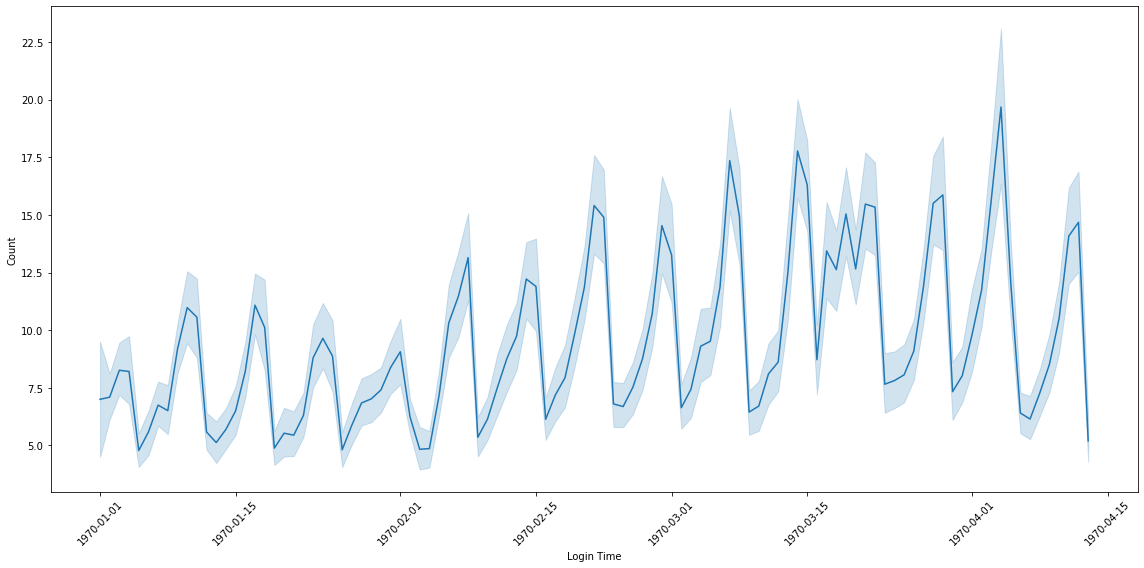

In [184]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='login_time',
             y='login_count',
             data=df)
plt.xticks(rotation=45)
plt.xlabel('Login Time')
plt.ylabel('Count')
plt.tight_layout()


#### Day of the Week

In [159]:
df['day_Of_Week'] = df['login_time'].dt.day_name().str[:3]
df['time_Of_Day'] = df['login_time'].dt.strftime('%H:%M')
df.login_time = pd.to_datetime(df.login_time).dt.date


In [161]:
df.head()

,login_time,login_count,day_Of_Week,time_Of_Day
0,1970-01-01,2,Thu,20:00
1,1970-01-01,6,Thu,20:15
2,1970-01-01,9,Thu,20:30
3,1970-01-01,7,Thu,20:45
4,1970-01-01,1,Thu,21:00


<ipython-input-185-1fc957dd540c>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



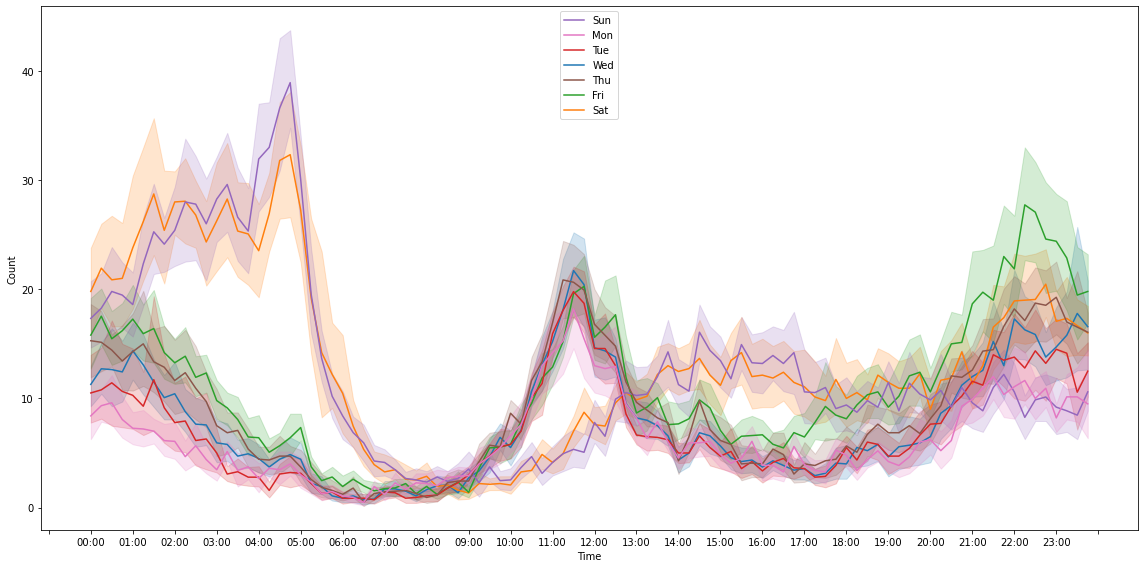

In [185]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.lineplot(x='time_Of_Day',
             y='login_count',
             hue='day_Of_Week',
             data=df.sort_values(by='time_Of_Day'))
plt.xlabel('Time')
plt.ylabel('Count')

axs = plt.axes()
axs.xaxis.set_major_locator(ticker.MultipleLocator(4))

handles, labels = axs.get_legend_handles_labels()

handles = [handles[[i for i, day in list(enumerate(labels)) if day == 'Sun'][0]],
           handles[[i for i, day in list(
               enumerate(labels)) if day == 'Mon'][0]],
           handles[[i for i, day in list(
               enumerate(labels)) if day == 'Tue'][0]],
           handles[[i for i, day in list(
               enumerate(labels)) if day == 'Wed'][0]],
           handles[[i for i, day in list(
               enumerate(labels)) if day == 'Thu'][0]],
           handles[[i for i, day in list(
               enumerate(labels)) if day == 'Fri'][0]],
           handles[[i for i, day in list(enumerate(labels)) if day == 'Sat'][0]]]
labels = [labels[[i for i, day in list(enumerate(labels)) if day == 'Sun'][0]],
          labels[[i for i, day in list(enumerate(labels)) if day == 'Mon'][0]],
          labels[[i for i, day in list(enumerate(labels)) if day == 'Tue'][0]],
          labels[[i for i, day in list(enumerate(labels)) if day == 'Wed'][0]],
          labels[[i for i, day in list(enumerate(labels)) if day == 'Thu'][0]],
          labels[[i for i, day in list(enumerate(labels)) if day == 'Fri'][0]],
          labels[[i for i, day in list(enumerate(labels)) if day == 'Sat'][0]]]

axs.legend(handles, labels, loc='upper center')

plt.tight_layout()


# Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.


1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

    The metric of success I would use would be to take the average ratio of available drivers of each city. If the average is higher for city A or B then we can calculate whether the average ratio converges or stays the same after the initiative.

 
2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

a) how you will implement the experiment
    I would implement the experiment by calculated the median of total number of available drivers before and after the initiative took place. If we see that the median converaged to an even split, .5 we can then assume that the initiative is working. 
    
b) what statistical test(s) you will conduct to verify the significance of the
observation

I would take the average ratio of avaliable driver per city. Since we don't know if each city has the  same number of drivers. Doing this will account for the sample ratio mismatch since we are assuming that there is a 50/50 split. Then I would multiply the observed number of drivers available by 5% that will become our expected value. Then using Chi statistics we would take the ((observed-expected)^2)/expected). After, calculate our degrees of freedom. Then, we can use a p value table to locate our score. Finally, if the p-value is below 5% we can conclude that we reject the null hypothesis meaning that there is a significant statistical difference in availablity of drivers in both cities. Else, we can accept the null hypothesis that there isn't a significant statistical difference in available drivers in both cities. We can simulate our findings using a bootstrap technique to estimate different permutations of our study. 

c) how you would interpret the results and provide recommendations to the city
operations team along with any caveat

If we find that our p-value < 5% then we can assume that there is a statistical difference in availability of drivers for both cities. Therefore, we would recommend the city to continue reimbursing all toll costs. If we see that there isn't a significant difference in available drivers then we would encourage the city to try and find a different way to incentivize the drivers. 

Caveats:
Our study doesn't account for times of high demand, when there are not that many drivers on the roads for reasons such as weather, construction, and cost of gas. 